In [1]:
# sklearn inbuilt datasets
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
# classification dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [4]:
feature_names = datasets.load_breast_cancer().feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
len(feature_names)

30

In [6]:
# Using ANN for classification
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

2024-05-14 00:25:40.285330: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 00:25:40.285606: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 00:25:40.287604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 00:25:40.313414: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 00:25:40.852839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/10


/home/aria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3460 - loss: 59.4229  
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.3791 - loss: 19.2126
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5671 - loss: 3.6364
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.6997 - loss: 1.1314
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8806 - loss: 0.8193
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7606 - loss: 0.7670
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8654 - loss: 0.5926
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8216 - loss: 0.6117
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8892 - loss: 0.5487
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8620 - loss: 0.5886


In [7]:
# Predict SHAP values
explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 100))
# Kernel Explainer is used for deep learning models as it is computationally expensive to calculate SHAP values for deep learning models

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [18]:
shap_values = explainer.shap_values(X_test[:20])
# I have sampled only 100 from train data to create the explainer obj, this is to reduce the computational cost
# Also I am calculating SHAP values for only 20 samples from test data, you can calculate for all the samples


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 444us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 441us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 430us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 430us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 419us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 444us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 426us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 4s 575us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 494us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 3s 454us/step
1/1 

In [19]:
shap_values.shape

(20, 30, 2)

In [20]:
shap_values2 = shap_values.reshape(shap_values.shape[-1], shap_values.shape[0], -1)
shap_values2.shape

(2, 20, 30)

In [21]:
shap_values2[0].shape

(20, 30)

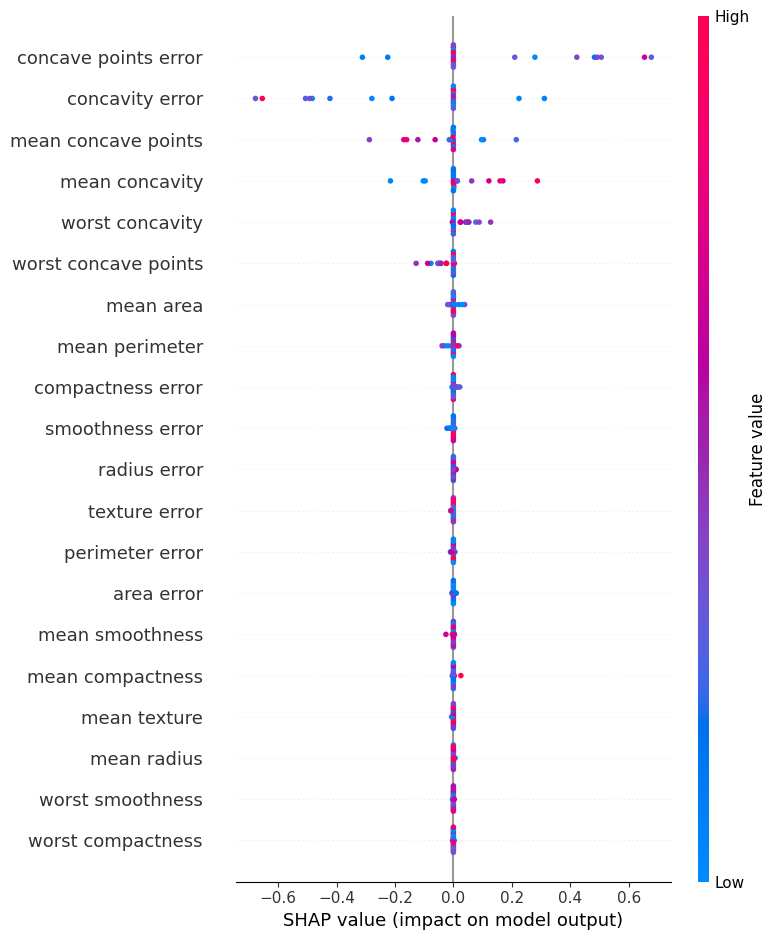

In [24]:
# plot SHAP values
shap.summary_plot(shap_values2[0], X_test[:20], feature_names=np.array(feature_names))

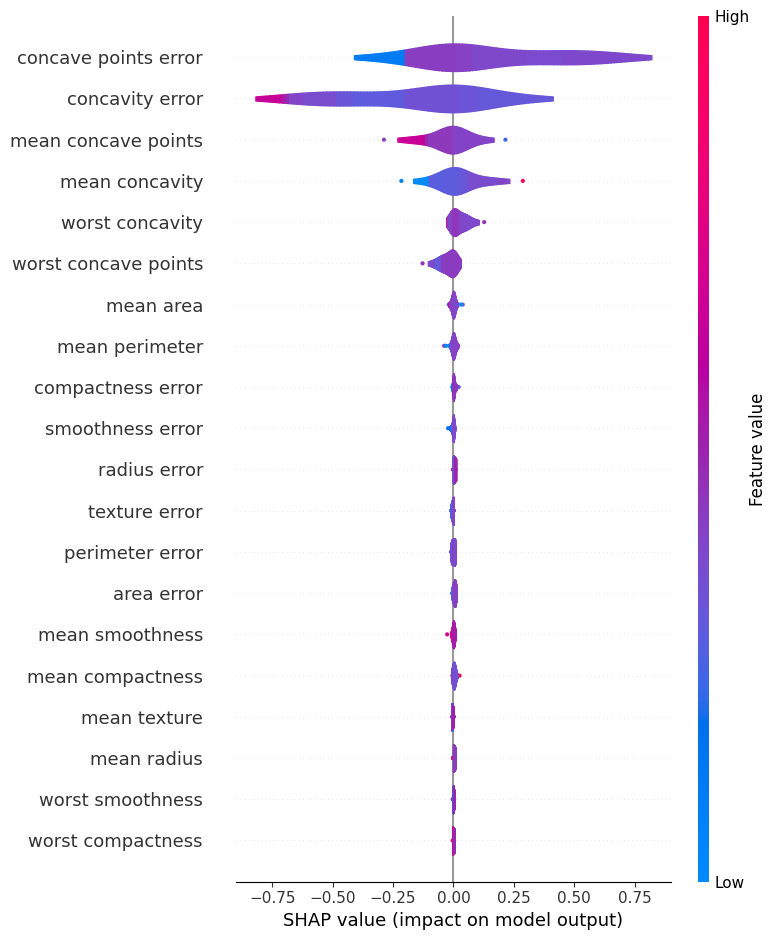

In [27]:
shap.summary_plot(shap_values2[0], X_test[:20], feature_names=np.array(feature_names), plot_type='violin')

In [38]:
shap_values[0][0]

array([0., 0.])

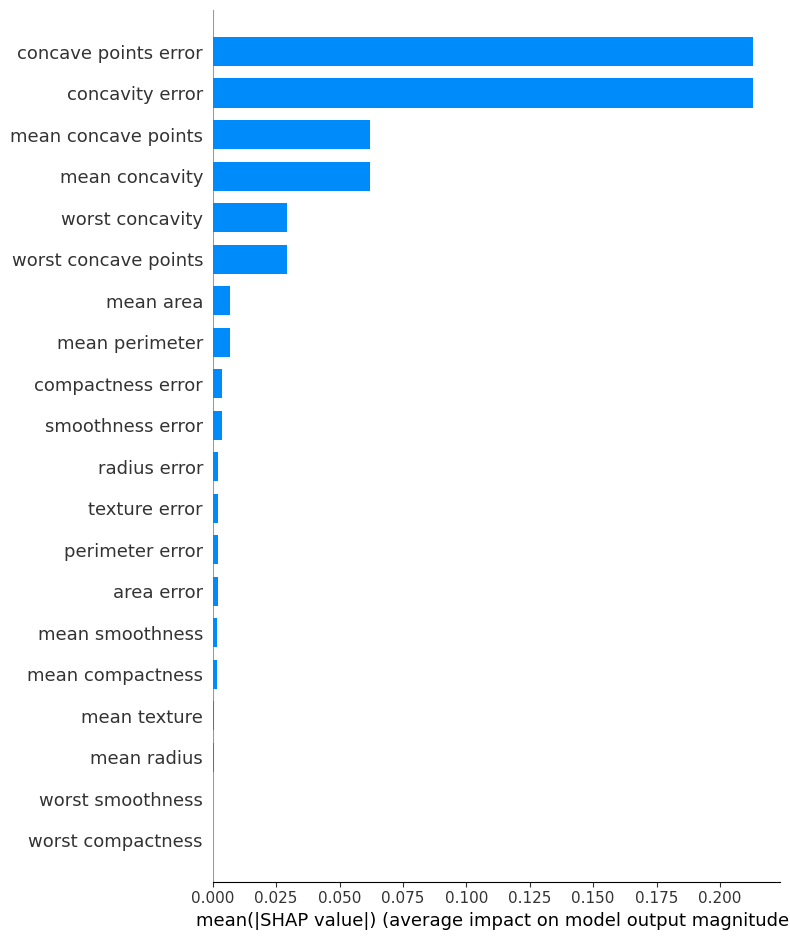

In [35]:
shap.summary_plot(shap_values2[0], X_test[:20], feature_names=np.array(feature_names), plot_type='bar')